In [ ]:
from transformers import pipeline

In [24]:
depth_estimator = pipeline(task="depth-estimation",
                        model="./models/Intel/dpt-hybrid-midas")

Info about ['Intel/dpt-hybrid-midas'](https://huggingface.co/Intel/dpt-hybrid-midas)

In [ ]:
from PIL import Image
import requests

img_url = 'https://images.unsplash.com/photo-1725524089635-4c4e35b19ada?q=80&w=2670&auto=format&fit=crop&ixlib=rb-4.0.3&ixid=M3wxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8fA%3D%3D'

raw_image =  Image.open(
    requests.get(img_url, stream=True).raw).convert('RGB')
raw_image.resize((720, 375))

- If you'd like to generate this image or something like it, check out the short course on [Gradio](https://www.deeplearning.ai/short-courses/building-generative-ai-applications-with-gradio/) and go to the lesson "Image Generation App".

In [25]:
output = depth_estimator(raw_image)

In [26]:
output

{'predicted_depth': tensor([[[  87.3482,   90.8892,   93.0232,  ...,  267.3440,  270.4933,
            221.8687],
          [  88.5797,   89.7514,   91.9418,  ...,  268.6602,  271.4175,
            281.9457],
          [  90.7225,   92.4537,   93.2610,  ...,  265.2903,  271.2834,
            277.0589],
          ...,
          [1928.9900, 1932.4261, 1931.6127,  ..., 1835.2826, 1831.3483,
           1831.1799],
          [1940.4136, 1939.5248, 1941.7156,  ..., 1837.6764, 1841.7966,
           1830.9202],
          [1930.8081, 1942.0826, 1940.1422,  ..., 1846.2717, 1843.3466,
           1835.4707]]]),
 'depth': <PIL.Image.Image image mode=L size=2670x1780>}

- Post-process the output image to resize it to the size of the original image.

In [27]:
output["predicted_depth"].shape

torch.Size([1, 384, 384])

In [28]:
output["predicted_depth"].unsqueeze(1).shape

torch.Size([1, 1, 384, 384])

In [29]:
prediction = torch.nn.functional.interpolate(
    output["predicted_depth"].unsqueeze(1),
    size=raw_image.size[::-1],
    mode="bicubic",
    align_corners=False,
)

In [30]:
prediction.shape

torch.Size([1, 1, 1780, 2670])

In [31]:
raw_image.size[::-1],

((1780, 2670),)

In [32]:
prediction

tensor([[[[  86.8155,   86.7996,   86.9188,  ...,  211.0557,  209.3273,
            209.5587],
          [  86.8435,   86.8278,   86.9456,  ...,  212.2800,  210.5867,
            210.8135],
          [  87.0194,   87.0048,   87.1137,  ...,  220.0712,  218.6016,
            218.7984],
          ...,
          [1929.9709, 1929.9252, 1930.2678,  ..., 1834.7103, 1834.4596,
           1834.4930],
          [1928.6476, 1928.5956, 1928.9843,  ..., 1835.2874, 1835.0485,
           1835.0801],
          [1928.4415, 1928.3887, 1928.7847,  ..., 1835.3778, 1835.1407,
           1835.1724]]]])

- Normalize the predicted tensors (between 0 and 255) so that they can be displayed.

In [33]:
import numpy as np 

In [34]:
output = prediction.squeeze().numpy()
formatted = (output * 255 / np.max(output)).astype("uint8")
depth = Image.fromarray(formatted)

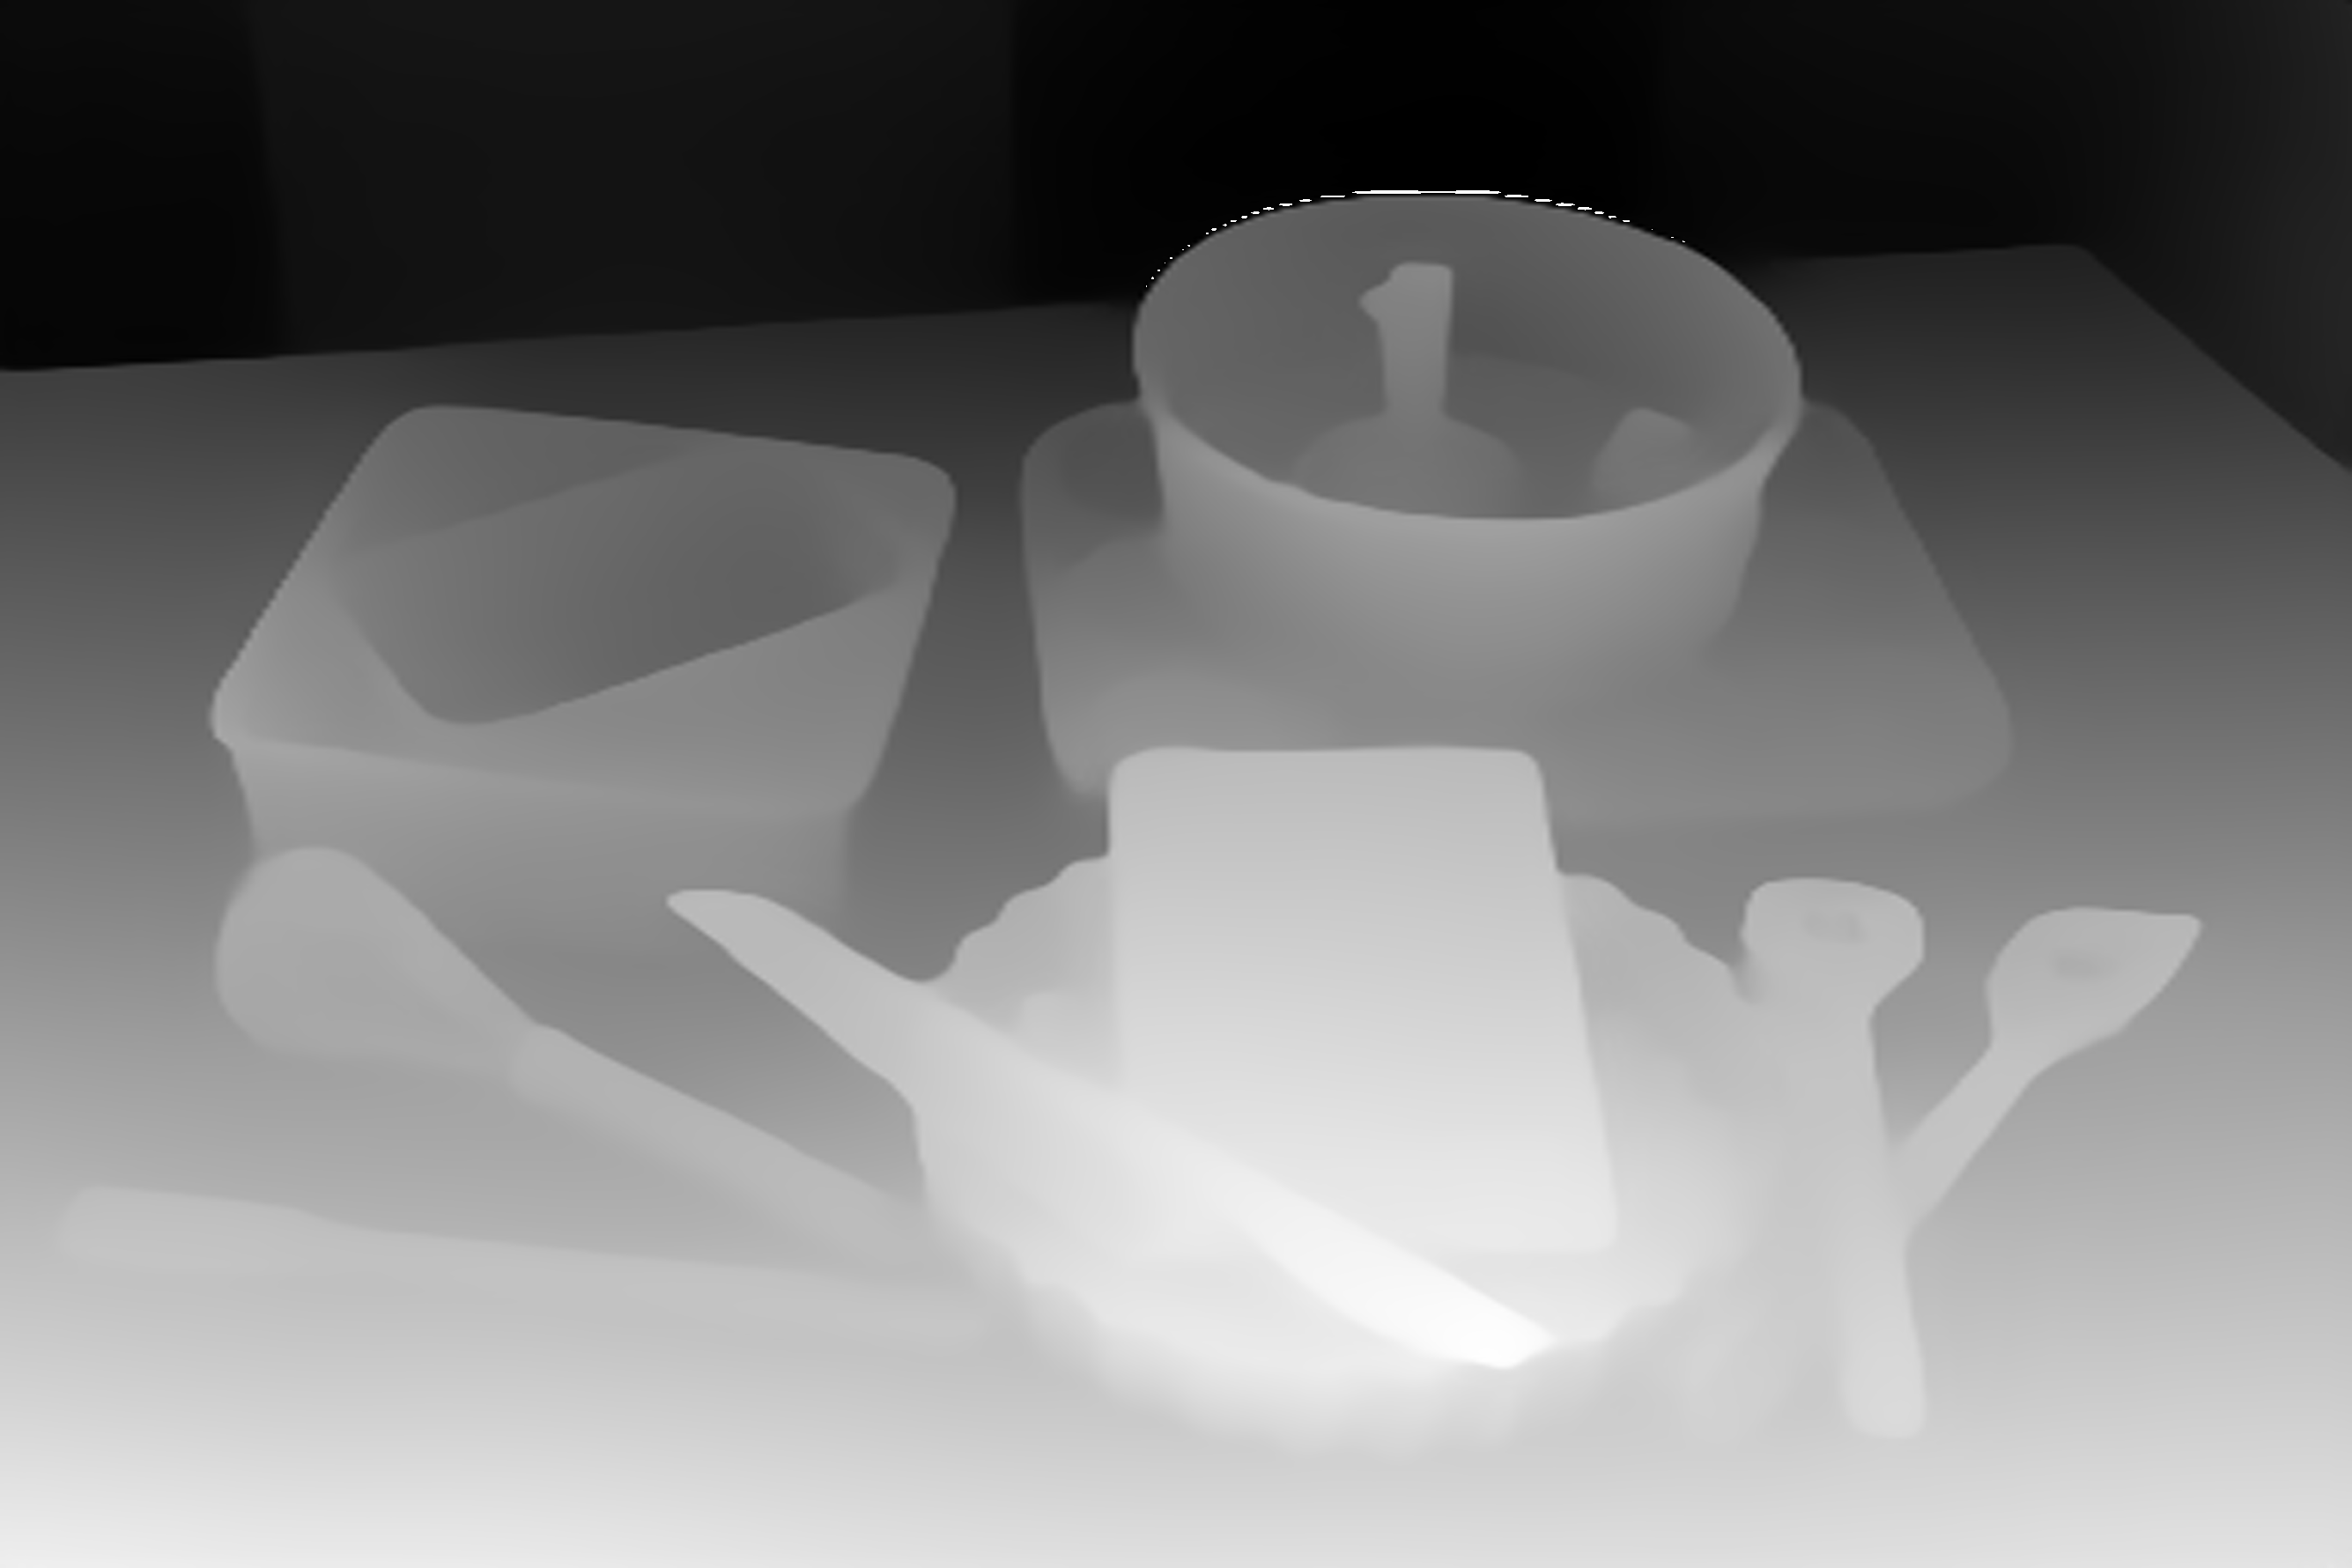

In [35]:
depth